In [30]:
import json
import re
import matplotlib.pyplot as plt
import os

In [31]:
def iterate_files(do_percents):
    # assign directory
    directory = '/home/ss6/downloads/BLM'
    dates_list = []
    for filename in os.listdir(directory):
        if filename != "tokenized_tweets.txt":
            f = os.path.join(directory, filename)
            # checking if it is a file
            if os.path.isfile(f):
                if do_percents:
                    dates_list = dates_list + calculate_percents(f)
                else:
                    dates_list = dates_list + create_time_series(f)
    x, y = zip(*dates_list) # unpack a list of pairs into two tuples
    return x,y

In [35]:
def calculate_percents(file_name):
    time_dict = {}
    total_date_dict = {}
    with open(file_name) as data_file:    
        data = json.load(data_file)
        for i in data:
            text = i["text"].lower()
            date = i["created_at"].split(" ")[0]
            
            if date in total_date_dict:
                total_date_dict[date] = total_date_dict[date] + 1
            else:
                total_date_dict[date] = 1
                
            #getting tweets related to voting    
            if re.match(r'^(vote)|(voting)|(voted)|(votes)$',text):
                if date in time_dict:
                    time_dict[date] = time_dict[date] + 1
                else:
                    time_dict[date] = 1
                    
        for day in time_dict:
            time_dict[day] = round(time_dict[day]/total_date_dict[day], 2)
        lists = sorted(time_dict.items()) # sorted by key, return a list of tuples
        return lists

In [36]:
def create_time_series(file_name):
    time_dict = {}
    with open(file_name) as data_file:    
        data = json.load(data_file)
        for i in data:
            text = i["text"].lower()
            date = i["created_at"].split(" ")[0]
            if re.match(r'^(vote)|(voting)|(voted)|(votes)$',text):
                if date in time_dict:
                    time_dict[date] = time_dict[date] + 1
                else:
                    time_dict[date] = 1
        lists = sorted(time_dict.items()) # sorted by key, return a list of tuples
        return lists

In [37]:
def main():
    f = plt.figure(1)
    x,y = iterate_files(False)
    fig, ax = plt.subplots()
    ax.xaxis.set_major_locator(plt.MaxNLocator(6))
    plt.plot(x, y)
    plt.xlabel("Date")
    plt.ylabel("Number of tweets")
    plt.title("Number of tweets about voting per day")
    plt.xticks(rotation = 45)
    f.show()
    
    g = plt.figure(2)
    x,y = iterate_files(True)
    fig, ax = plt.subplots()
    ax.xaxis.set_major_locator(plt.MaxNLocator(6))
    plt.plot(x, y)
    plt.xlabel("Date")
    plt.ylabel("Percent of tweets")
    plt.title("Percent of tweets about voting per day")
    plt.xticks(rotation = 45)
    g.show()

<Figure size 432x288 with 0 Axes>

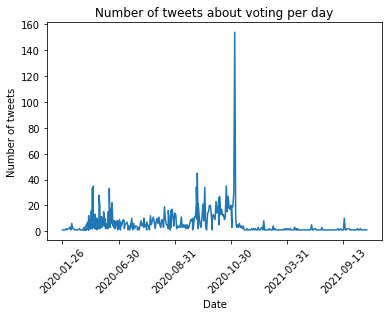

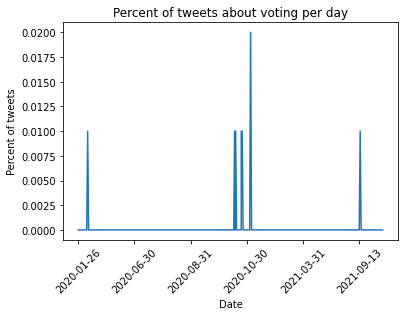

In [38]:
if __name__ == "__main__": 
    main()